# Feature Transformation And Skewness Handling :

Concept — What is Skewness & Why Fix It?
Skewness measures the asymmetry of a feature’s distribution.

Many ML models (especially linear regression, logistic regression, SVM) assume normal (bell-shaped) data for continuous features.

If your feature is heavily skewed, model assumptions break:

Predictions may be biased

Errors are not evenly distributed

Feature importance may be misleading

Types of Skewness

Right-skewed (positive): Long tail on the right — often sales, income, transaction amounts.

Left-skewed (negative): Long tail on the left — sometimes discounts, losses.

In [1]:
#detecting skewness:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Example data
df = pd.DataFrame({
    "Sales": [100, 200, 300, 400, 500, 600, 2000, 5000, 8000, 15000]
})


Skewness:
1.9046004987309593


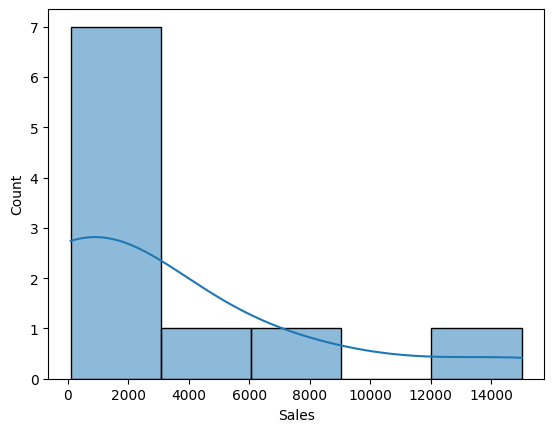

In [3]:
print(f'Skewness:\n{df['Sales'].skew()}')
sns.histplot(df['Sales'],kde=True)
plt.show()

Rule of Thumb:

Skewness > 1: Highly skewed → fix.

Skewness between 0.5–1: Moderately skewed → maybe fix.

Skewness < 0.5: No need.

,so we can see that the sales data is highly skewed so we have to fix it


## Log transform

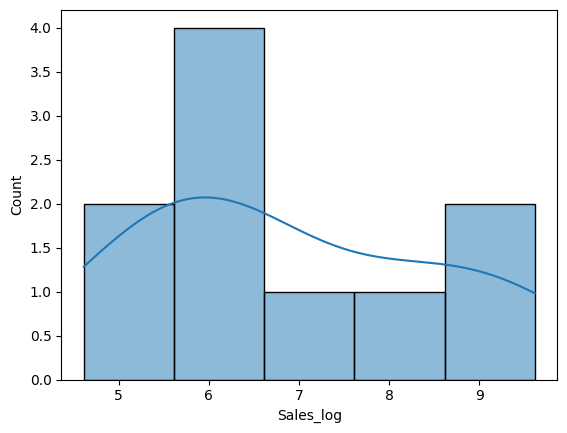

In [4]:
df['Sales_log']=np.log1p(df['Sales']) #it handles log0
sns.histplot(df['Sales_log'],kde=True)
plt.show()

## BoxCox (Positive Only)

In [5]:
from scipy import stats
Sales_boxCox,lambda_value=stats.boxcox(df['Sales'])
print(f"boxCox Lambda: {lambda_value}")

boxCox Lambda: -0.15513010394676452


## Yeo Johnson (Handles Negatives also)

In [6]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')

df['Sales_Yeo']=pt.fit_transform(df[['Sales']])
df

,Sales,Sales_log,Sales_Yeo
0,100,4.615121,-1.628998
1,200,5.303305,-1.032168
2,300,5.707110,-0.710771
3,400,5.993961,-0.494499
4,500,6.216606,-0.333207
5,600,6.398595,-0.205481
6,2000,7.601402,0.553025
7,5000,8.517393,1.042041
8,8000,8.987322,1.266975
9,15000,9.615872,1.543084


In [7]:
#main application in part 1 acutually

# Handling the Outliers


What are Outliers?
An outlier is a data point that is significantly different from most other values in the dataset.
They can:

Skew your statistical summaries (mean, standard deviation, etc.).

Distort machine learning models.

Sometimes be actual errors… but sometimes be real rare events.

Example
If most employees earn between ₹30k–₹60k per month, but one person earns ₹5 lakh, that’s an outlier.

In [8]:
df = pd.DataFrame({"Salary": [30000, 32000, 35000, 36000, 580000, 40000, 37000]})

In [9]:
df

,Salary
0,30000
1,32000
2,35000
3,36000
4,580000
5,40000
6,37000


In [10]:
def cap_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)


In [14]:
df=iqr_df
cap_outliers(iqr_df,'Salary')


In [15]:
# another method for the outliersdetection is the z-score method

from scipy import stats
df

,Salary
0,30000
1,32000
2,35000
3,36000
4,46000
5,40000
6,37000


In [16]:
z_scored_df=df
z_score=stats.zscore(df['Salary'])
z_scored_df=z_scored_df[abs(z_score)>3]
z_score


array([-1.34252933, -0.93393345, -0.32103962, -0.11674168,  1.92623774,
        0.70045009,  0.08755626])

there is no outliers found using z-score method

In [ ]:
# last method is visualization


In [ ]:
# 1. BoxPlot:
sns.boxplot()